<a href="https://colab.research.google.com/github/BjorkMagno/Portafolio/blob/main/data-science/notas/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Lectura de datos</h1>

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv('/content/prestacar.csv')

In [3]:
datos.head()

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54025 entries, 0 to 54024
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ingresos_cliente    54025 non-null  float64
 1   anualidad_prestamo  54025 non-null  float64
 2   años_casa_propia    54025 non-null  float64
 3   telefono_trab       54025 non-null  int64  
 4   evaluacion_ciudad   54025 non-null  float64
 5   score_1             54025 non-null  float64
 6   score_2             54025 non-null  float64
 7   score_3             54025 non-null  float64
 8   score_social        54025 non-null  float64
 9   cambio_telefono     54025 non-null  float64
 10  moroso              54025 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.5 MB


## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [9]:
X = datos.drop(columns='moroso', axis=1)
y = datos.moroso

In [10]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier()
modelo.fit(X, y)
modelo.score(X, y)

1.0

In [11]:
print(f'La exatitud del modelo es de: {modelo.score(X,y)}')

La exatitud del modelo es de: 1.0


### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [12]:
from sklearn.model_selection import train_test_split

In [44]:
X , X_test , y , y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=5)

In [46]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)
print(f'Exactitud del modelo con el conjunto entrenamiento es de: {modelo.score(X_train, y_train)}')
print(f'Exactitud del modelo con el conjuto de evaluacion es de: {modelo.score(X_val, y_val)}')

Exactitud del modelo con el conjunto entrenamiento es de: 1.0
Exactitud del modelo con el conjuto de evaluacion es de: 0.8534535765525723


In [47]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)
print(f'Exactitud del modelo con el conjunto entrenamiento es de: {modelo.score(X_train, y_train)}')
print(f'Exactitud del modelo con el conjuto de evaluacion es de: {modelo.score(X_val, y_val)}')

Exactitud del modelo con el conjunto entrenamiento es de: 0.9223201475712236
Exactitud del modelo con el conjuto de evaluacion es de: 0.9076655052264808


### Evaluando el modelo

In [18]:
from sklearn.metrics import confusion_matrix

In [48]:
y_previsto = modelo.predict(X_val)
matriz_confusion = confusion_matrix(y_val, y_previsto)
print(matriz_confusion)

[[8823   83]
 [ 818   34]]


In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

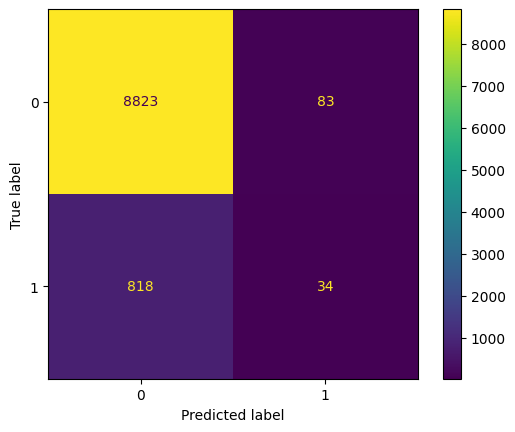

In [49]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=modelo.classes_)
visualizacion.plot();

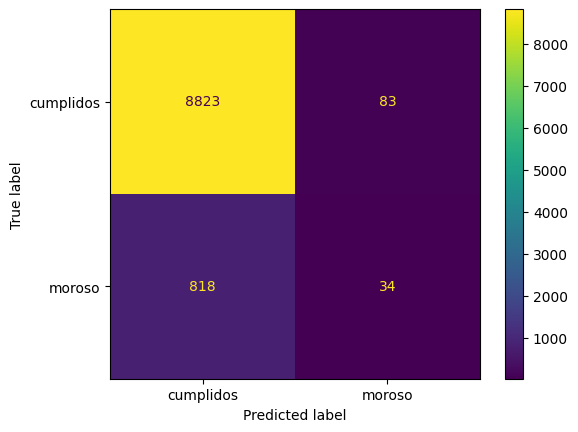

In [50]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['cumplidos', 'moroso'])
visualizacion.plot();

## <font color='dark'>Desafío 1.10</h1>

Iidentificar cómo importar el algoritmo Random Forest a partir de la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
modelo_d = RandomForestClassifier(max_depth = 10)
modelo_d.fit(X_train, y_train)
print(f'Precisión de entrenamiento: {modelo_d.score(X_train, y_train)}')
print(f'Precisión de validación: {modelo_d.score(X_val, y_val)}')

Precisión de entrenamiento: 0.915301974448316
Precisión de validación: 0.9129866736347008


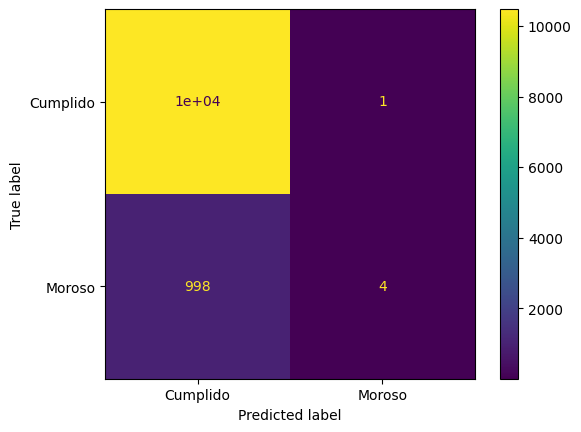

In [42]:
y_previsto_d = modelo_d.predict(X_val)
matriz_confusion_d = confusion_matrix(y_val, y_previsto)
visualizacion = ConfusionMatrixDisplay(confusion_matrix= matriz_confusion_d,
                                      display_labels = ['Cumplido', 'Moroso'])
visualizacion.plot();

## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [33]:
45/(45+123)

0.26785714285714285

In [51]:
print(f'Precisión: {precision_score(y_val, y_previsto)}')
print(f'Sensibilidad: {recall_score(y_val, y_previsto)}')
print(f'Exactitud: {accuracy_score(y_val, y_previsto)}')

Precisión: 0.2905982905982906
Sensibilidad: 0.03990610328638498
Exactitud: 0.9076655052264808


In [52]:
print(f'El F1-score del modelo es : {accuracy_score(y_val,y_previsto)}')

El F1-score del modelo es : 0.9076655052264808


### Curva ROC

In [53]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




In [54]:
from sklearn.metrics import RocCurveDisplay

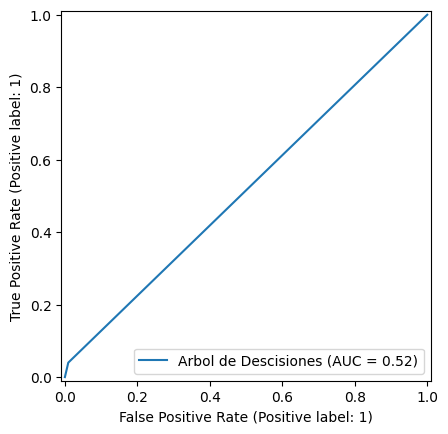

In [59]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Arbol de Descisiones');

In [60]:
from sklearn.metrics import roc_auc_score

In [62]:
print(f'El area bajo la curva ROC es: {roc_auc_score(y_val, y_previsto)}')

El area bajo la curva ROC es: 0.5152932717195455


### Curva de  precisión x sensibilidad

In [63]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


In [64]:
from sklearn.metrics import PrecisionRecallDisplay

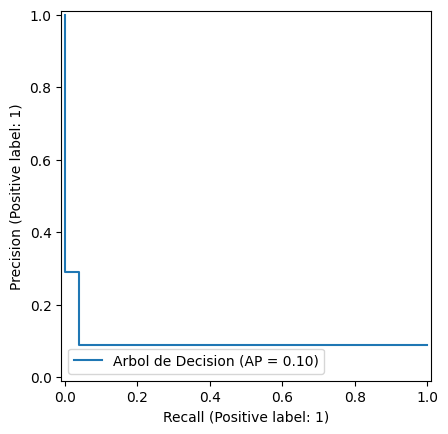

In [65]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto,name='Arbol de Decision');

In [66]:
from sklearn.metrics import average_precision_score

In [67]:
print(f'El promedio de precision es: {average_precision_score(y_val, y_previsto)}')

El promedio de precision es: 0.09542529881204685


### Informe de métricas

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      8906
           1       0.29      0.04      0.07       852

    accuracy                           0.91      9758
   macro avg       0.60      0.52      0.51      9758
weighted avg       0.86      0.91      0.87      9758



## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

In [83]:
from sklearn.model_selection import KFold, cross_validate

In [84]:
modelo = DecisionTreeClassifier(max_depth=10)
kfold = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kfold)
cv_resultados

{'fit_time': array([0.19361258, 0.19376278, 0.19263649, 0.19247675, 0.19193697]),
 'score_time': array([0.00327563, 0.00320697, 0.00381851, 0.00320983, 0.00309825]),
 'test_score': array([0.90252338, 0.9087998 , 0.90596977, 0.90622598, 0.91160646])}

In [87]:
cv_resultados['test_score']

array([0.90252338, 0.9087998 , 0.90596977, 0.90622598, 0.91160646])

In [89]:
promedio = cv_resultados['test_score'].mean()
desvio_std = cv_resultados['test_score'].std()
print(f'El promedio de exactitud es: {promedio}')
print(f'El desvio estandar de exactitud es: {desvio_std}')
print(f'El intervalo de confianza es de: [{promedio - 2*desvio_std} , {promedio + 2*desvio_std}]')

El promedio de exactitud es: 0.9070250749892004
El desvio estandar de exactitud es: 0.0030382957805111664
El intervalo de confianza es de: [0.900948483428178 , 0.9131016665502227]


### Validación cruzada con sensibilidad

In [96]:
def intervalo_confianza (resultados):
  promedio = resultados.mean()
  desvio_std = resultados.std()
  return f'El intervalo de confianza es de: [{promedio - 2*desvio_std} , {promedio + 2*desvio_std}]'

In [97]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring='recall')
cv_resultados

{'fit_time': array([0.19776273, 0.19256377, 0.20100713, 0.19245076, 0.19180942]),
 'score_time': array([0.00606203, 0.00555801, 0.00542307, 0.00531697, 0.00539708]),
 'test_score': array([0.02542373, 0.03742515, 0.02737752, 0.02886003, 0.00930233])}

In [98]:
intervalo_confianza(cv_resultados['test_score'])

'El intervalo de confianza es de: [0.0073641150398050075 , 0.04399138678796108]'

## DEsafio 3.05

construye un código para generar el intervalo de confianza para cada una de las métricas utilizando la validación cruzada:

Exactitud
Recall
Precisión
F1-score
Un consejo es explorar la documentación del método cross_validate a partir de este [material de apoyo](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate), donde puedes descubrir una forma más simple de retornar las métricas de una sola vez con una lista de cadenas.

In [100]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring = ['accuracy','recall', 'precision', 'f1'])
cv_resultados

{'fit_time': array([1.47957444, 0.57119465, 0.53905082, 0.41145325, 0.22415614]),
 'score_time': array([0.04816985, 0.0382762 , 0.04126   , 0.01847196, 0.01168442]),
 'test_accuracy': array([0.90277956, 0.90905598, 0.90558545, 0.90673841, 0.91122214]),
 'test_recall': array([0.02118644, 0.03592814, 0.02737752, 0.03318903, 0.00930233]),
 'test_precision': array([0.18518519, 0.26666667, 0.2345679 , 0.28395062, 0.1       ]),
 'test_f1': array([0.03802281, 0.06332454, 0.04903226, 0.05943152, 0.01702128])}

In [101]:
def informe_metricas(resultados):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultados[metrica].mean()
        desvio_estandar = resultados[metrica].std()
        print(f'Intervalo de confianza({metrica}): [{media-2*desvio_estandar}, {min(media+2*desvio_estandar, 1.0)}]')


In [102]:
informe_metricas(cv_resultados)

Intervalo de confianza(test_accuracy): [0.9012862513558427, 0.9128663576355888]
Intervalo de confianza(test_recall): [0.006374377870815136, 0.044419008039105805]
Intervalo de confianza(test_precision): [0.08166207668607825, 0.3464860714620699]
Intervalo de confianza(test_f1): [0.012006203403648608, 0.07872676105829242]


### Estratificando los datos

In [103]:
datos['moroso'].value_counts()

,count
moroso,
0,49309
1,4716


In [104]:
from sklearn.model_selection import StratifiedKFold

In [105]:
modelo = DecisionTreeClassifier(max_depth=10)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=skfold, scoring='recall')
cv_resultados

{'fit_time': array([0.20259976, 0.19112849, 0.19348788, 0.19028902, 0.19164753]),
 'score_time': array([0.00677729, 0.00543737, 0.00551486, 0.0053277 , 0.00619197]),
 'test_score': array([0.02052786, 0.01466276, 0.03230543, 0.04992658, 0.02492669])}

In [106]:
intervalo_confianza(cv_resultados['test_score'])

'El intervalo de confianza es de: [0.004116333997474325 , 0.052823391522612145]'

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

In [107]:
from imblearn.over_sampling import SMOTE

In [108]:
oversampling = SMOTE()
X_smote, y_smote = oversampling.fit_resample(X, y)

In [109]:
y_smote.value_counts()

,count
moroso,
0,35624
1,35624


In [110]:
y_smote.value_counts(normalize=True)

,proportion
moroso,
0,0.5
1,0.5


In [111]:
modelo = DecisionTreeClassifier(max_depth=10)
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X_smote, y_smote, cv=skfold, scoring='recall')
cv_resultados

{'fit_time': array([0.46384716, 0.42576718, 0.43041372, 0.43361831, 0.43395591]),
 'score_time': array([0.00684881, 0.00664973, 0.00677824, 0.00707316, 0.00669265]),
 'test_score': array([0.75382456, 0.73459649, 0.73614035, 0.72810219, 0.72673684])}

In [112]:
intervalo_confianza(cv_resultados['test_score'])

'El intervalo de confianza es de: [0.7165345112671874 , 0.7552256628908353]'

### Pipeline para validación

In [119]:
from imblearn.pipeline import Pipeline as imbpipeline

In [124]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arbol', modelo)])

In [125]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skfold, scoring='recall')

In [126]:
intervalo_confianza(cv_resultados['test_score'])

'El intervalo de confianza es de: [0.2092283808019912 , 0.2913404738666218]'

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

In [127]:
from imblearn.under_sampling import NearMiss

In [128]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample', NearMiss(version = 3)), ('arbol', modelo)])
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skfold, scoring='recall')

In [129]:
intervalo_confianza(cv_resultados['test_score'])

'El intervalo de confianza es de: [0.5938159529823841 , 0.7430562506512235]'

### Probando el modelo

In [130]:
undersample = NearMiss(version=3)
X_undersample, y_undersample = undersample.fit_resample(X, y)

              precision    recall  f1-score   support

           0       0.94      0.45      0.61      6288
           1       0.11      0.68      0.18       601

    accuracy                           0.47      6889
   macro avg       0.52      0.56      0.40      6889
weighted avg       0.86      0.47      0.57      6889



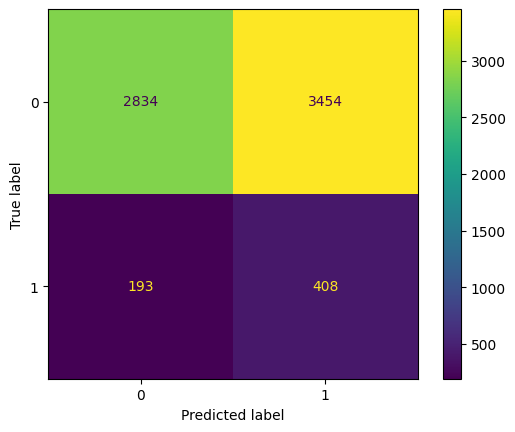

In [131]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_undersample, y_undersample)
y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);

### SMOTEEN

Utiliza el algoritmo [SMOTEENN](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html), que combina el oversampling con SMOTE y el undersampling con el ENN (Edited Nearest Neighbours), para balancear los datos y observa los resultados obtenidos por el modelo usando el pipeline y la validación cruzada.

In [132]:
from imblearn.combine import SMOTEENN

In [133]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('smoteenn', SMOTEENN()), ('arbol', modelo)])

In [136]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring = 'recall')
intervalo_confianza(cv_resultados['test_score'])

'El intervalo de confianza es de: [0.36368306731787514 , 0.48610226648053245]'